In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

### Data set attribute information

FullDate: Date in format yyyy-mm-dd  hh:mm:ss

ElecPrice: Prices of electricity charged in Kw per hour

Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T

SysLoad: Total Load on system or Power consumed at time-T 

Tmax: maximum temperature at time-T

In [ ]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
df['FullDate'] = pd.to_datetime(df['FullDate'])     #converting FulDate column to date time type

In [ ]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.set_index('FullDate', inplace=True)

### Plot

Text(0, 0.5, 'electric Price')

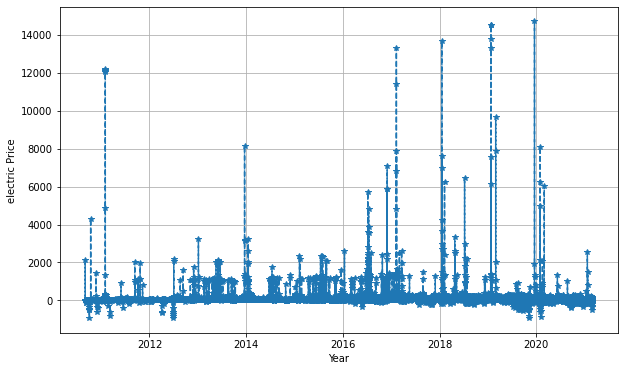

In [ ]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'electric Price' ) 

In [ ]:
df.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


## Moving Average

In [ ]:
df_MA = df.copy()
MA = df_MA[ 'ElecPrice' ].rolling(12).mean() 


Text(0, 0.5, 'Electric price')

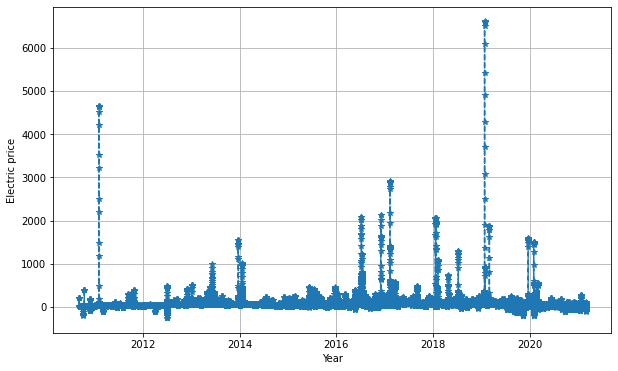

In [ ]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df_MA.index, MA, '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Electric price' ) 

## Checking the trend and seasonality

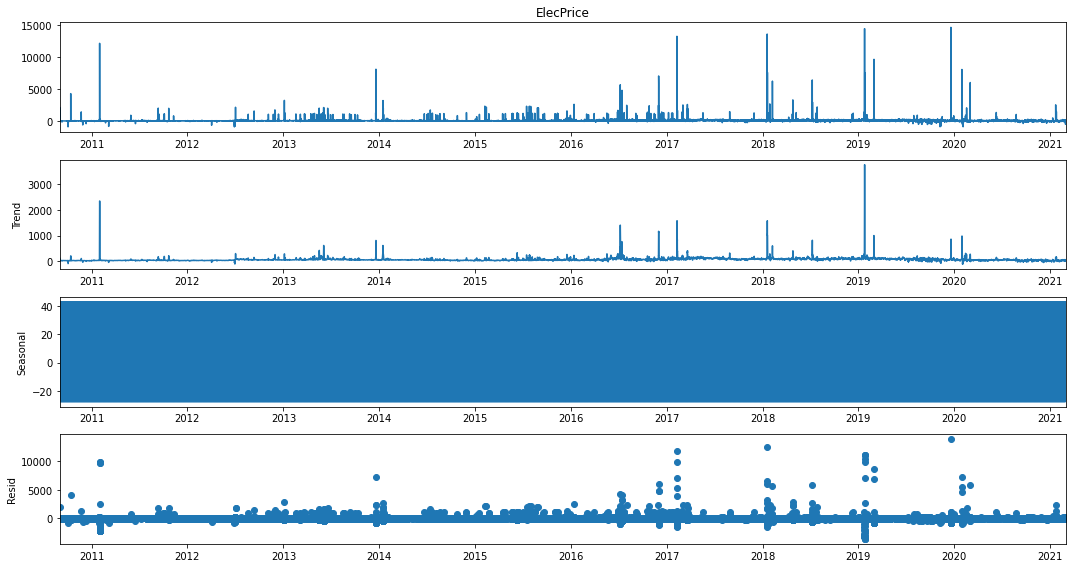

In [ ]:
import statsmodels.api as sm 
from pylab import rcParams 
rcParams[ 'figure.figsize' ] = 15 , 8 
decompose_series = sm.tsa.seasonal_decompose(df[ 'ElecPrice' ], model= 'additive' ) 
decompose_series.plot() 
plt.show() 

## Adfuller

In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df[ 'ElecPrice' ]) 
print(f'ADF Statistic: {adf_result[ 0 ]}') 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print( f'No. of lags used: {adf_result[ 2 ]} ' ) 
print( f'No. of observations used : {adf_result[ 3 ]} ' ) 
print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {v} ' ) 

ADF Statistic: -31.952975699557843
p-value: 0.0 
No. of lags used: 53 
No. of observations used : 91962 
Critical Values:
 1% : -3.430421110703783 
 5% : -2.8615714297867108 
 10% : -2.56678672898094 


From the results obtained, the p-value is greater than the critical value at a 5% 
significance level and, the ADF statistic is less that any of the critical values 
obtain. #This confirms that the series is indeed stationary. 

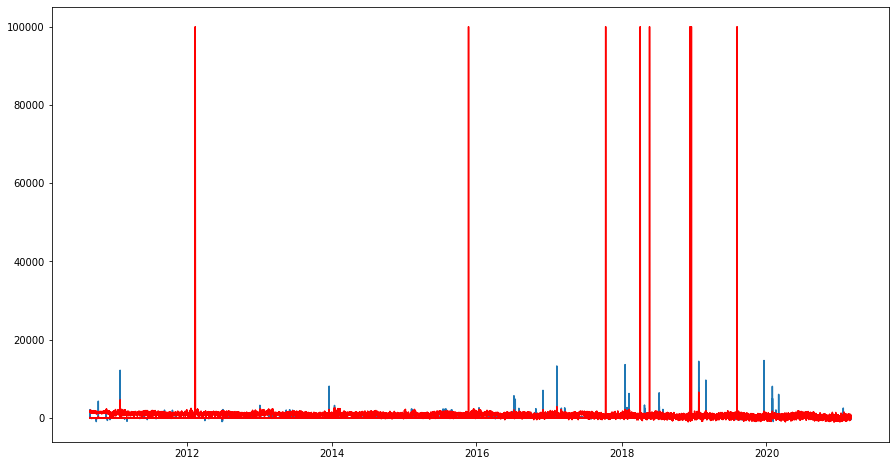

In [ ]:
plt.plot(df.index, df.ElecPrice, '-' ) 
plt.plot(df.rolling( 12 ).mean(), color= 'red') 

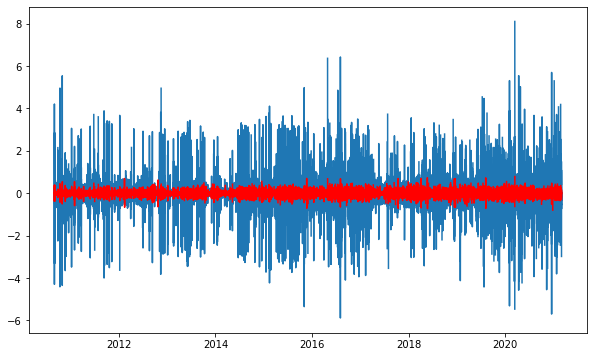

In [ ]:
plt.figure(figsize=( 10 , 6 )) 
df_log = np.log(df) 
df_diff = df_log.diff(periods= 1 ) 
plt.plot(df_diff.index, df_diff.ElecPrice, '-' ) 
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red')

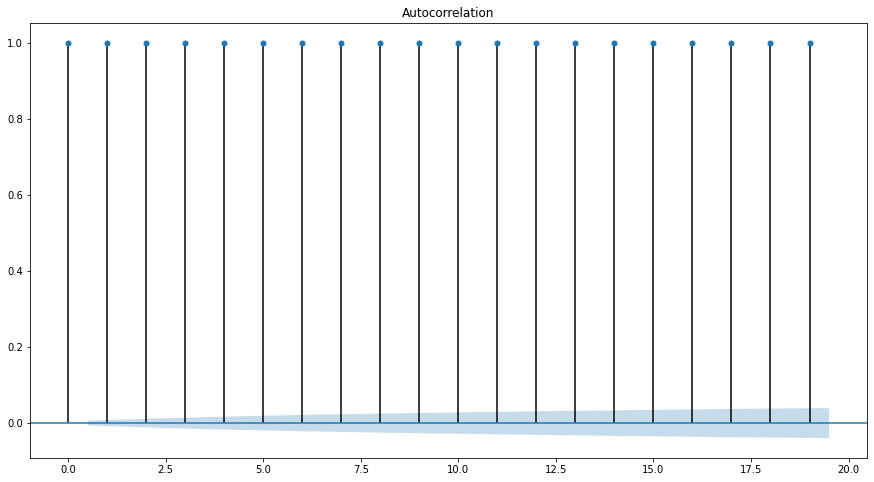

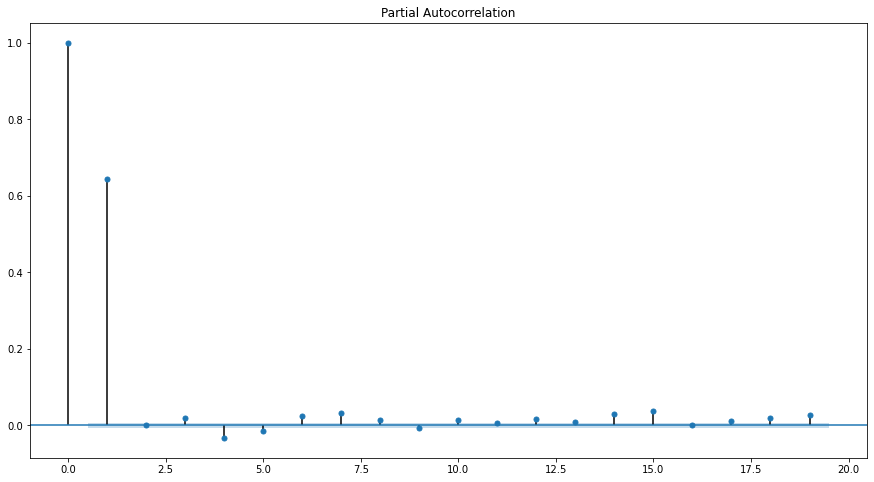

In [ ]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
#ACF 
plot_acf(df.index, lags = range( 0 , 20 )) 
plt.show() 
#PACF 
plot_pacf(df['ElecPrice'], lags = range( 0 , 20 )) 
plt.show() 

## Using daily frequency 

In [ ]:
df_daily = df.resample( 'D' ).mean()

In [ ]:
df_Month = df.resample( 'M' ).mean()

In [ ]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Text(0, 0.5, 'Electric price')

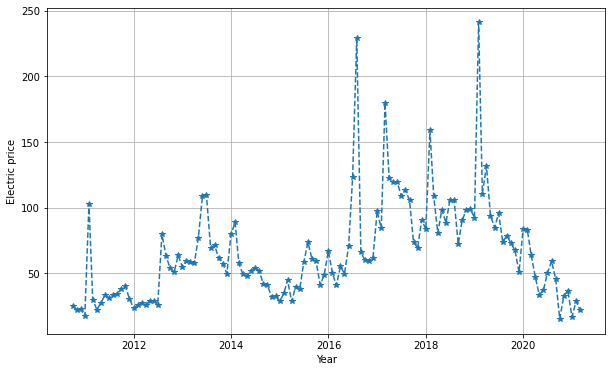

In [ ]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df_Month.index, df_Month['ElecPrice'], '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Electric price' ) 

Text(0, 0.5, 'Electric price')

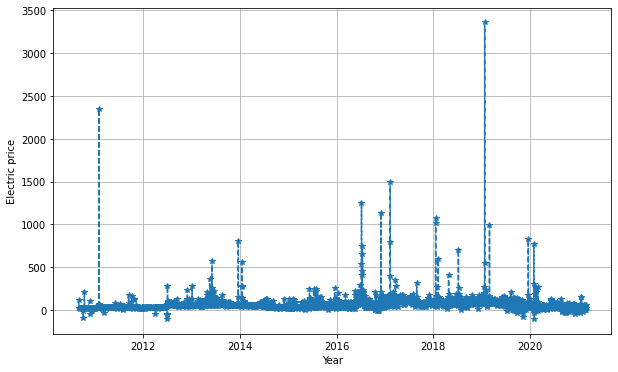

In [ ]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df_daily.index, df_daily['ElecPrice'], '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Electric price' ) 

## ADfuller

In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df_daily[ 'SysLoad' ]) 
print(f'ADF Statistic: {adf_result[ 0 ]} ' ) 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print(f'No. of lags used: {adf_result[ 2 ]} ' ) 
print( f'No. of observations used : {adf_result[ 3 ]} ' ) 
print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {v} ' ) 


ADF Statistic: -3.6901589888366413 
p-value: 0.0042537255045741835 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df_daily[ 'GasPrice' ]) 
print(f'ADF Statistic: {adf_result[ 0 ]} ' ) 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print(f'No. of lags used: {adf_result[ 2 ]} ' ) 
print( f'No. of observations used : {adf_result[ 3 ]} ' ) 
print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {v} ' ) 

ADF Statistic: -2.902766697165181 
p-value: 0.045027212884625294 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df_daily[ 'ElecPrice' ]) 
print(f'ADF Statistic: {adf_result[ 0 ]} ' ) 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print(f'No. of lags used: {adf_result[ 2 ]} ' ) 
print( f'No. of observations used : {adf_result[ 3 ]} ' ) 
print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {v} ' ) 

ADF Statistic: -8.269053866873804 
p-value: 4.848817773711633e-13 
No. of lags used: 20 
No. of observations used : 3813 
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


## Spliting to train test dataset

In [ ]:
train_set = df_daily[:2757]
test_set = df_daily[2757:]

In [ ]:
train_set = train_set.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" }) 

In [ ]:
train_set.tail()

,Tmax,SysLoad,GasPrice,y
FullDate,,,,
2018-03-15,25.4,1130.792744,9.1928,113.222500
2018-03-16,27.0,821.269333,9.0400,94.888958
2018-03-17,30.2,44.972794,8.7100,71.599375
2018-03-18,21.2,-170.934915,8.4995,45.333958
2018-03-19,23.4,363.808310,8.3030,83.262708


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1077 entries, 2018-03-20 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       1077 non-null   float64
 1   SysLoad    1077 non-null   float64
 2   GasPrice   1077 non-null   float64
 3   ElecPrice  1077 non-null   float64
dtypes: float64(4)
memory usage: 42.1 KB


In [ ]:
ds = train_set.index
dt_test = test_set.index
y = train_set['ElecPrice']
y_test = test_set['ElecPrice']

In [ ]:
ds

DatetimeIndex(['2010-09-01', '2010-09-02', '2010-09-03', '2010-09-04',
               '2010-09-05', '2010-09-06', '2010-09-07', '2010-09-08',
               '2010-09-09', '2010-09-10',
               ...
               '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-18', '2018-03-19'],
              dtype='datetime64[ns]', name='FullDate', length=2757, freq='D')

In [ ]:
!pip install prophet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536176 sha256=41808752943679cd67d957313c9f696ac0e182a4fbe88979b7d5f48664ea58ff
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdsta

In [ ]:
from fbprophet import Prophet 


In [ ]:
X_train = train_set.drop('ElecPrice', axis=1)
y_train = train_set['ElecPrice']
X_test = test_set.drop('ElecPrice', axis=1)
y_test = test_set['ElecPrice']

In [ ]:
m = Prophet()
m.fit(train_set)

ValueError: ignored